# Clustering: K-Means In-Depth

Here we'll explore **K Means Clustering**, which is an unsupervised clustering technique.

We'll start with our standard set of initial imports

In [47]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# use seaborn plotting defaults
import seaborn as sns; sns.set()

## Introducing K-Means

K Means is an algorithm for **unsupervised clustering**: that is, finding clusters in data based on the data attributes alone (not the labels).

K Means is a relatively easy-to-understand algorithm.  It searches for cluster centers which are the mean of the points within them, such that every point is closest to the cluster center it is assigned to.

Let's look at how KMeans operates on the simple clusters we looked at previously. To emphasize that this is unsupervised, we'll not plot the colors of the clusters:

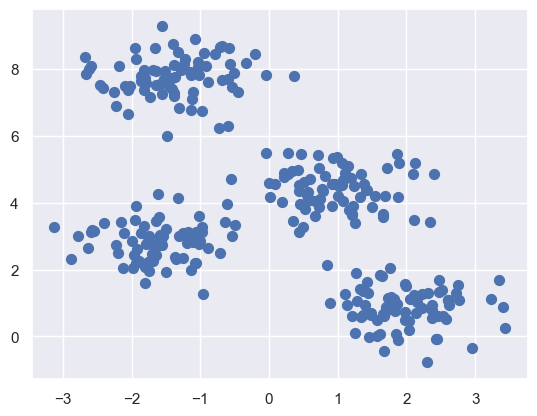

In [3]:
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=300, centers=4,
                  random_state=0, cluster_std=0.60)
plt.scatter(X[:, 0], X[:, 1], s=50);

By eye, it is relatively easy to pick out the four clusters. If you were to perform an exhaustive search for the different segmentations of the data, however, the search space would be exponential in the number of points. Fortunately, there is a well-known *Expectation Maximization (EM)* procedure which scikit-learn implements, so that KMeans can be solved relatively quickly.

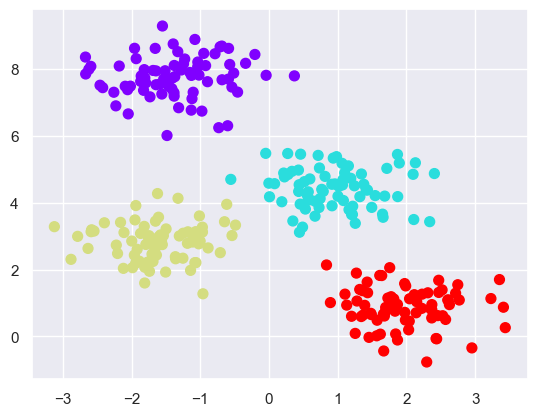

In [4]:
from sklearn.cluster import KMeans
est = KMeans(4)  # 4 clusters
est.fit(X)
y_kmeans = est.predict(X)
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='rainbow');

The algorithm identifies the four clusters of points in a manner very similar to what we would do by eye!

## The K-Means Algorithm: Expectation Maximization

K-Means is an example of an algorithm which uses an *Expectation-Maximization* approach to arrive at the solution.
*Expectation-Maximization* is a two-step approach which works as follows:

1. Guess some cluster centers
2. Repeat until converged
   A. Assign points to the nearest cluster center
   B. Set the cluster centers to the mean 
   
Let's quickly visualize this process:

This algorithm will (often) converge to the optimal cluster centers.

### KMeans Caveats

The convergence of this algorithm is not guaranteed; for that reason, scikit-learn by default uses a large number of random initializations and finds the best results.

Also, the number of clusters must be set beforehand... there are other clustering algorithms for which this requirement may be lifted.

## Application of KMeans to Digits (An unorthodox example)

For a closer-to-real-world example, let's again take a look at the digits data. Here we'll use KMeans to automatically cluster the data in 64 dimensions, and then look at the cluster centers to see what the algorithm has found.

In [49]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt

In [50]:

# Load the Digits dataset (8x8 images of handwritten digits 0-9)
digits = load_digits()
X = digits.images  # Images (8x8 pixels)
y = digits.target  # Labels (0-9)


In [51]:
print(X.shape)
print(y.shape)

(1797, 8, 8)
(1797,)


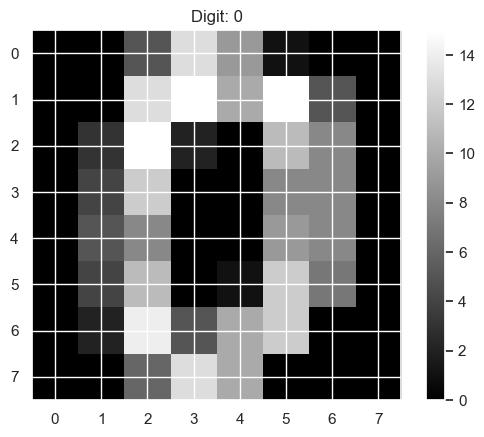

In [52]:
# Reshape X[0] back to its original 8x8 form
img_idx=0

plt.imshow(X[img_idx].reshape(8, 8), cmap='gray')
plt.colorbar()
plt.title(f"Digit: {y[img_idx]}")
plt.show()

In [53]:
# This image is 0
img_idx=0

print(X[img_idx].shape)
print("--------------------")
np.set_printoptions(linewidth=150, precision=2, suppress=True)  # Adjust formatting
print(X[img_idx])

print("--------------------")

print(y[img_idx])


(8, 8)
--------------------
[[ 0.  0.  5. 13.  9.  1.  0.  0.]
 [ 0.  0. 13. 15. 10. 15.  5.  0.]
 [ 0.  3. 15.  2.  0. 11.  8.  0.]
 [ 0.  4. 12.  0.  0.  8.  8.  0.]
 [ 0.  5.  8.  0.  0.  9.  8.  0.]
 [ 0.  4. 11.  0.  1. 12.  7.  0.]
 [ 0.  2. 14.  5. 10. 12.  0.  0.]
 [ 0.  0.  6. 13. 10.  0.  0.  0.]]
--------------------
0


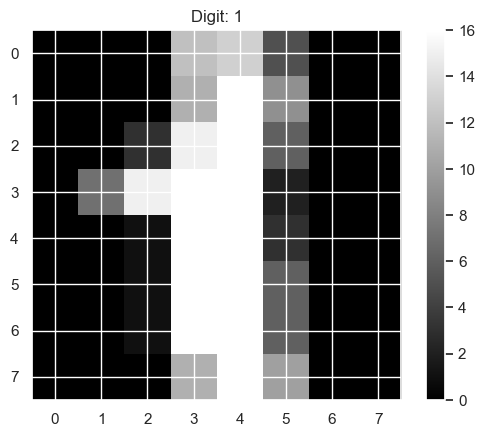

In [54]:
# Lets look at X[1], which is digit 1
# Reshape X[1] back to its original 8x8 form
img_idx=1

plt.imshow(X[img_idx].reshape(8, 8), cmap='gray')
plt.colorbar()
plt.title(f"Digit: {y[img_idx]}")
plt.show()

In [55]:
# This vlaues of the pixels are 
img_idx=1

print(X[img_idx].shape)
print("--------------------")
np.set_printoptions(linewidth=150, precision=2, suppress=True)  # Adjust formatting
print(X[img_idx])

print("--------------------")

print(y[img_idx])

(8, 8)
--------------------
[[ 0.  0.  0. 12. 13.  5.  0.  0.]
 [ 0.  0.  0. 11. 16.  9.  0.  0.]
 [ 0.  0.  3. 15. 16.  6.  0.  0.]
 [ 0.  7. 15. 16. 16.  2.  0.  0.]
 [ 0.  0.  1. 16. 16.  3.  0.  0.]
 [ 0.  0.  1. 16. 16.  6.  0.  0.]
 [ 0.  0.  1. 16. 16.  6.  0.  0.]
 [ 0.  0.  0. 11. 16. 10.  0.  0.]]
--------------------
1


In [56]:
# Flatten the images if needed (convert 8x8 into 1D array of 64 pixels)
X = X.reshape(X.shape[0], -1)  # Converts (1797, 8, 8) -> (1797, 64)
print(X.shape)

(1797, 64)


In [57]:
#Lets see how does X[0] looks like now after reshape. It is 1D array, with 64 features, aka columns
print(X[0])

[ 0.  0.  5. 13.  9.  1.  0.  0.  0.  0. 13. 15. 10. 15.  5.  0.  0.  3. 15.  2.  0. 11.  8.  0.  0.  4. 12.  0.  0.  8.  8.  0.  0.  5.  8.  0.  0.
  9.  8.  0.  0.  4. 11.  0.  1. 12.  7.  0.  0.  2. 14.  5. 10. 12.  0.  0.  0.  0.  6. 13. 10.  0.  0.  0.]


In [58]:
# Apply KMeans clustering
est = KMeans(n_clusters=10, random_state=42)
clusters = est.fit_predict(X)  # Clustering on the entire dataset

# Display the shape of the cluster centers
print(f"Cluster Centers Shape: {est.cluster_centers_.shape}")  # Should be (10, 64)


Cluster Centers Shape: (10, 64)


We see ten clusters in 64 dimensions. Let's visualize each of these cluster centers to see what they represent:

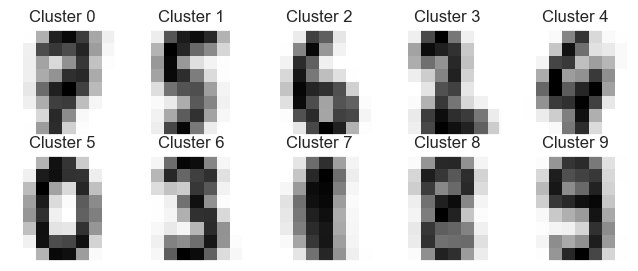

In [59]:
import matplotlib.pyplot as plt

# Create a figure with a specified size (8 inches wide, 3 inches tall)
fig = plt.figure(figsize=(8, 3))  

# Loop through all 10 clusters found by KMeans
for i in range(10):
    # Add a subplot to the figure: a 2-row, 5-column grid 
    # '1 + i' ensures each image appears in the correct position
    ax = fig.add_subplot(2, 5, 1 + i, xticks=[], yticks=[])  

    # Reshape the i-th cluster center from 1D (64 pixels) back to 2D (8x8 image)
    # Use a grayscale colormap (binary) to display the image
    ax.imshow(est.cluster_centers_[i].reshape((8, 8)), cmap=plt.cm.binary)  

    # Add a title to each subplot showing the cluster number
    ax.set_title(f"Cluster {i}")

# Display the full figure with all the subplots
plt.show()


We see that *even without the labels*, KMeans is able to find clusters whose means are recognizable digits (with apologies to the number 8)!




K-Means assigns arbitrary cluster labels, so Cluster 3 ≠ Digit 3.

Following step maps clusters to the correct digit labels based on frequency.
## Example:

## Before Mapping: (Cluster Labels from K-Means)
Cluster Number->	Digits in Cluster

0->	4, 4, 4, 4, 9, 4, 4, 4, 4, 4

1->	1, 1, 1, 1, 1, 1, 1, 1, 1, 1

2->	9, 9, 9, 9, 4, 9, 9, 9, 9, 9

...	...

## After Mapping: (Corrected Cluster Labels)
Cluster Number ->	Assigned Digit which is the most frequently occuring digit.

0->	4 (since 4 is the most frequent digit in cluster 0)

1->	1

2->	9

...	...

In other worrds, the cluster labels are permuted; following code fixes this:

In [73]:
# Print the digits belonging to each cluster
for i in range(10):  # For each cluster
    mask = (clusters == i)  # Get indices of data points belonging to cluster i
    digits_in_cluster = y[mask]  # Get the true labels (digits) of points in this cluster
    print(f"Cluster {i} contains the following digits: {digits_in_cluster}")

Cluster 0 contains the following digits: [7 7 7 7 7 7 2 7 7 7 7 3 7 7 7 7 7 7 7 7 7 7 7 7 7 3 7 7 7 9 7 9 7 7 7 7 7 9 9 7 7 9 7 9 7 7 7 9 7 7 7 7 7 7 7 7 7 7 7 7 7 4 7 7 7 7 7 7 7 7 7 7 7 7
 7 7 7 7 7 7 7 7 7 7 4 7 4 7 7 4 7 7 7 7 7 7 7 7 7 7 7 7 2 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 4 7 3 7 7 7 7 7 7 7 7 7 3 7 7 7 7 7 7 7 7 7 7 7 7 7
 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 8 7 3 7 3 7 9 7 7 8 7 7 7 7 7 3 7 7 7 7 7 7 7 7]
Cluster 1 contains the following digits: [5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5
 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 8 5 5 5 5 1 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 8 5 5 5 9 9 5 5 5 5 5 5 5 9 9 5 5 3 5 5 5 5 5 3 5]
Cluster 2 contains the following digits: [6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 1 6 6 6 6 1 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6
 6 6 6 6 8 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 

In [61]:
# Map each cluster to the most common actual digit
from scipy.stats import mode

# Map each cluster to the most common actual digit
cluster_to_digit = {}
for i in range(10):  # Loop through each cluster
    mask = (clusters == i)  # Get indices where cluster == i
    if np.sum(mask) > 0:  # Ensure the cluster is not empty
        most_common_digit = mode(y[mask], keepdims=True).mode[0]  # Fix IndexError by using keepdims=True
        cluster_to_digit[i] = most_common_digit
    else:
        cluster_to_digit[i] = None  # Handle empty clusters

# Print the mapping of clusters to digits
print("Cluster to Digit Mapping:")
for cluster, digit in cluster_to_digit.items():
    print(f"Cluster {cluster} → Digit {digit}")

Cluster to Digit Mapping:
Cluster 0 → Digit 7
Cluster 1 → Digit 5
Cluster 2 → Digit 6
Cluster 3 → Digit 2
Cluster 4 → Digit 4
Cluster 5 → Digit 0
Cluster 6 → Digit 3
Cluster 7 → Digit 1
Cluster 8 → Digit 8
Cluster 9 → Digit 9


In [67]:
# Map predicted labels (clusters) to actual digit labels
predicted_labels = np.array([cluster_to_digit[cluster] for cluster in clusters])

# Calculate accuracy using accuracy_score
accuracy = accuracy_score(y, predicted_labels)

# Display the results
print(f"Clustering Accuracy: {accuracy * 100:.2f}%")

Clustering Accuracy: 86.14%


86% – not bad! Let's check-out the confusion matrix for this:

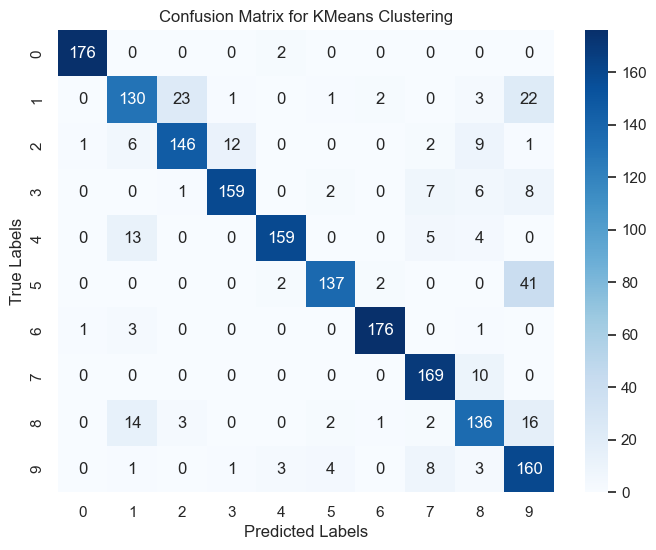

In [68]:
from sklearn.metrics import confusion_matrix

# Compute the confusion matrix
cm = confusion_matrix(y, predicted_labels)

# Plot the confusion matrix using Seaborn heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=range(10), yticklabels=range(10))
plt.title("Confusion Matrix for KMeans Clustering")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

Again, this is an 80% classification accuracy for an **entirely unsupervised estimator** which knew nothing about the labels.

## OPTIONAL: Example: KMeans for Color Compression

One interesting application of clustering is in color image compression. For example, imagine you have an image with millions of colors. In most images, a large number of the colors will be unused, and conversely a large number of pixels will have similar or identical colors.

Scikit-learn has a number of images that you can play with, accessed through the datasets module. For example:

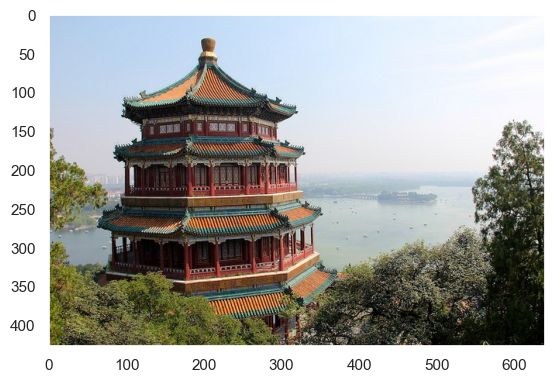

In [69]:
from sklearn.datasets import load_sample_image
china = load_sample_image("china.jpg")
plt.imshow(china)
plt.grid(False);

The image itself is stored in a 3-dimensional array, of size ``(height, width, RGB)``:

In [70]:
china.shape

(427, 640, 3)

We can envision this image as a cloud of points in a 3-dimensional color space. We'll rescale the colors so they lie between 0 and 1, then reshape the array to be a typical scikit-learn input:

In [71]:
X = (china / 255.0).reshape(-1, 3)
print(X.shape)

(273280, 3)


We now have 273,280 points in 3 dimensions.

Our task is to use KMeans to compress the $256^3$ colors into a smaller number (say, 64 colors). Basically, we want to find $N_{color}$ clusters in the data, and create a new image where the true input color is replaced by the color of the closest cluster.

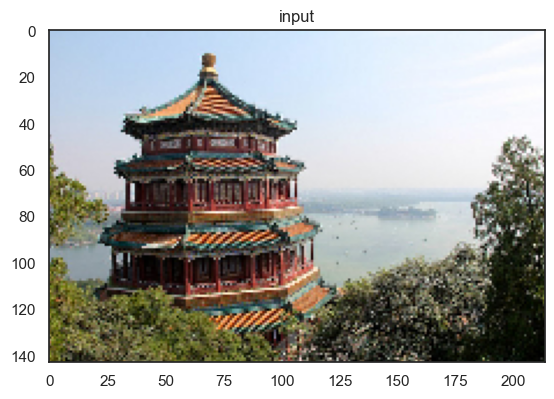

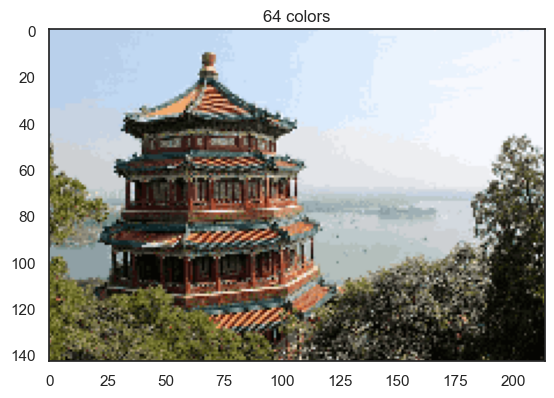

In [72]:
# reduce the size of the image for speed
image = china[::3, ::3]
n_colors = 64

X = (image / 255.0).reshape(-1, 3)
    
model = KMeans(n_colors)
labels = model.fit_predict(X)
colors = model.cluster_centers_
new_image = colors[labels].reshape(image.shape)
new_image = (255 * new_image).astype(np.uint8)

# create and plot the new image
with sns.axes_style('white'):
    plt.figure()
    plt.imshow(image)
    plt.title('input')

    plt.figure()
    plt.imshow(new_image)
    plt.title('{0} colors'.format(n_colors))

Compare the input and output image: we've reduced the $256^3$ colors to just 64.